<h1 style="text-align: center;">Z-Transform Operations</h1>
<p style="text-align: center;">Lab 11</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Analyze a discrete system using Python's built-in functions and a function developed by Christopher Felton.

### 2. Deliverables Overview 
##### Part 1  
[ ] Derivation for **Part 1, Task 1**.  
[ ] Derivation for **Part 1, Task 2**.  
[ ] Output for **Part 1, Task 3**.    
[ ] Pole-zero plot for **Part 1, Task 4**.  
[ ] Frequency response plot for **Part 1, Task 5**.  

### 3. Part 1
##### 3.1 Purpose
Consider the causal function,  $$ y[k] = 2x[k] - 40x[k - 1] + 10y[k - 1] - 16y[k - 2],$$ where $y[k]$ is the output and $x[k]$ is the input. Assume that the system is initally at rest.  

##### 3.2 Tasks
1. By hand, find $H(z)$. 

Insert your derivation for $H(z)$ here. *Note: include any major steps and your final answer here using LaTeX Math Mode.
>$$H(z) = \frac{2-40z^{-1}}{16z^{-2}-10z^{-1}+1}$$
>$$H(z) = \frac{2z(z-20)}{z^2-10z+16}$$
>$$\frac{H(z)}{z} = \frac{2(z-20)}{(z-8)(z-2)}$$

2. By hand, find $h[k]$ by partial fraction expansion.

Insert your derivation for $h[k]$ here.
>$$h[k] = [-4(8^k) + 6(2^k)] u[k]$$

3. use **scipy.signal.residuez()** to verify your partial fraction expansion.

In [1]:
# Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
# Insert code for Part 1, Task 3 here
num = [2, -40, 0]
den = [1, -10, 16]
res, pol, coef = sig.residuez(num, den)
print(f"Residue: {res} \nPoles: {pol} \nCoefficients: {coef}")

Residue: [ 6. -4.] 
Poles: [2. 8.] 
Coefficients: []


4. Use the provided **zplane()** function to obtain the pole-zero plot for $H(z)$.

In [3]:
#%% Zplane function

#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#
# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.
#
#
#
# Modified by Drew Owens in Fall 2018 for use in the University of Idaho's 
# Department of Electrical and Computer Engineering Signals and Systems I Lab
# (ECE 351)
#
# Modified by Morteza Soltani in Spring 2019 for use in the ECE 351 of the U of
# I.
#
# Modified by Phillip Hagen in Fall 2019 for use in the University of Idaho's  
# Department of Electrical and Computer Engineering Signals and Systems I Lab 
# (ECE 351)
    
def zplane(b,a,filename=None):
    """
    Plot the complex z-plane given a transfer function.
    
    Inputs: b - z-domain transfer function numerator
            a - z-domain transfer function denominator
            filename - name of file to save plot into. Defaults to none
            
    Returns: z - zeros
             p - poles
             k - system gain
    """

    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import patches    
    
    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = np.array(b)/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = np.array(a)/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'o', ms=10,label='Zeros')
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0)

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'x', ms=10,label='Poles')
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0)

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.legend()

    # set the ticks
    # r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    # ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    
    return z, p, k

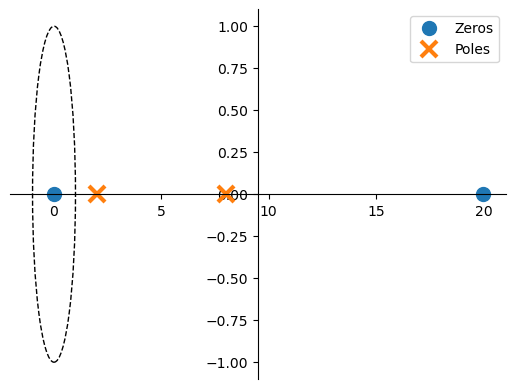

In [4]:
# Insert code for Part 1, Task 4 here
num = [2, -40, 0]
den = [1, -10, 16]
zeros, poles, gain = zplane(num, den)

5. Use **scipy.signal.freqz()** to plot the magnitude and phase responses of $H(z)$. *Note: You must set **whole = True** within the **scipy.signal.freqz()** command. (See function documentation for details).*

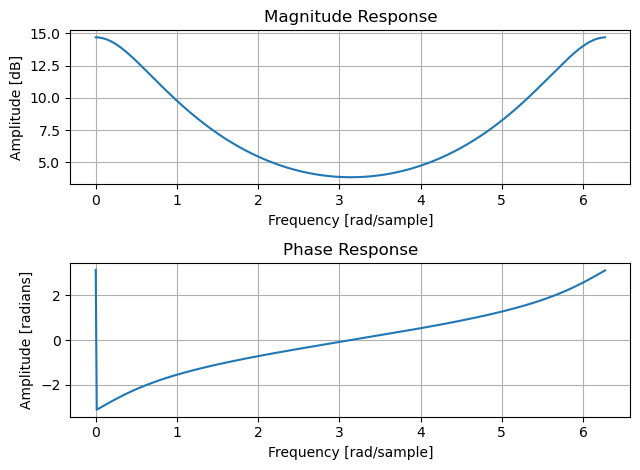

In [5]:
# Insert code for Part 1, Task 5 here
num = [2, -40, 0]
den = [1, -10, 16]
w, h = sig.freqz(num, den, whole=True)

#convert
mag = w/np.pi
phase = np.angle(h)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, (20*np.log10(np.abs(h))))
plt.grid()
plt.title("Magnitude Response")
plt.xlabel("Frequency [rad/sample]")
plt.ylabel("Amplitude [dB]")
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.title("Phase Response")
plt.xlabel("Frequency [rad/sample]")
plt.ylabel("Amplitude [radians]")
plt.grid()

plt.tight_layout()
plt.show()

### 4. Questions
1. Looking at the plot generated in **Task 4**, is $H(z)$ stable? Explain why or why not.
>$H(z)$ is not stable. A system is only stable if all poles of $H(z)$ lie inside the unit circle. In Task 4, there are two zeros. One lies within the unit circle, and the other lies at 20 which is not in the unit circle.
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>no feedback :\)